### Notebook 2 of Capstone Project: Exploratory Data Analysis

Some ideas for EDA: getting to that plot of seismicity over time; testing some ideas for modelling: counts of quakes/day, +/- by day, looking at total volume of water used over time, looking at % sand used over time, frac duration stats, correlations between the features (how to find this); how can I put a fracs/day type of feature in the seismicity dataframe; can i get into proximity of frac to the earthquake? 

Import the needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Combining the two seismicity catalogs to look at number of quakes over time

In [11]:
#read in the total seismicity catalog
seismicity = pd.read_csv('oil_and_gas_data/catalogs/total_seismicity_catalog.csv', index_col=0)
#i'm also going to read in the all_events usgs catalog so I have that plot handy
usgs_all = pd.read_csv('oil_and_gas_data/catalogs/final_usgs_all_events_catalog.csv', index_col=0)
#last, I will add in the fasola dataset to combine all into one large catalog
#recall that this fasola dataset is both the fasola and texnet catalog combined.
fasola = pd.read_csv('oil_and_gas_data/catalogs/fasola_texnet_catalog.csv', index_col=0)
#and to import the three catalogs combined csv
three_cats = pd.read_csv('oil_and_gas_data/catalogs/all_three_catalogs.csv', index_col=0)

In [4]:
seismicity.head(2)

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2010-03-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0
2010-03-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0


In [5]:
seismicity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4133 entries, 2010-03-01 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            304 non-null    object 
 1   Evaluation Status  304 non-null    object 
 2   Origin Time        304 non-null    object 
 3   Magnitude          4133 non-null   float64
 4   Latitude (WGS84)   304 non-null    float64
 5   Longitude (WGS84)  304 non-null    float64
 6   LocationName       292 non-null    object 
 7   Daily_Sum          4133 non-null   float64
 8   Daily_Avg          4133 non-null   float64
 9   Daily_Count        4133 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 355.2+ KB


In [6]:
usgs_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 2010-03-01 to 2021-01-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        65 non-null     object 
 1   Latitude (WGS84)   65 non-null     float64
 2   Longitude (WGS84)  65 non-null     float64
 3   Magnitude          3971 non-null   float64
 4   EventID            65 non-null     object 
 5   Evaluation Status  65 non-null     object 
dtypes: float64(3), object(3)
memory usage: 217.2+ KB


In [7]:
fasola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4395 entries, 2014-03-23 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2390 non-null   object 
 1   Longitude (WGS84)  2390 non-null   float64
 2   Latitude (WGS84)   2390 non-null   float64
 3   Magnitude          4395 non-null   float64
 4   EventID            168 non-null    object 
 5   LocationName       2390 non-null   object 
 6   Evaluation Status  2390 non-null   object 
 7   Daily_Sum          4395 non-null   float64
 8   Daily_Avg          4395 non-null   float64
 9   Daily_Count        4395 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 377.7+ KB


In [12]:
three_cats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 2010-03-01 to 2021-02-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        2397 non-null   object 
 1   Latitude (WGS84)   2397 non-null   float64
 2   Longitude (WGS84)  2397 non-null   float64
 3   Magnitude          5878 non-null   float64
 4   EventID            175 non-null    object 
 5   Evaluation Status  2397 non-null   object 
dtypes: float64(3), object(3)
memory usage: 321.5+ KB


In [8]:
seismicity.sort_index(inplace=True)
seismicity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4133 entries, 2010-03-01 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            304 non-null    object 
 1   Evaluation Status  304 non-null    object 
 2   Origin Time        304 non-null    object 
 3   Magnitude          4133 non-null   float64
 4   Latitude (WGS84)   304 non-null    float64
 5   Longitude (WGS84)  304 non-null    float64
 6   LocationName       292 non-null    object 
 7   Daily_Sum          4133 non-null   float64
 8   Daily_Avg          4133 non-null   float64
 9   Daily_Count        4133 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 355.2+ KB


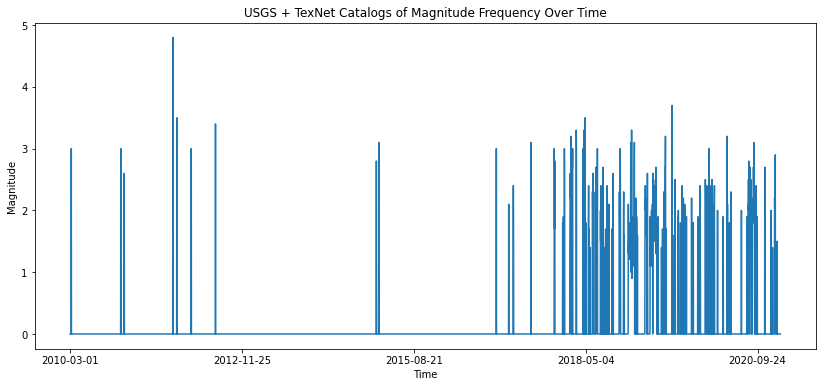

In [9]:
seismicity['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('USGS + TexNet Catalogs of Magnitude Frequency Over Time');

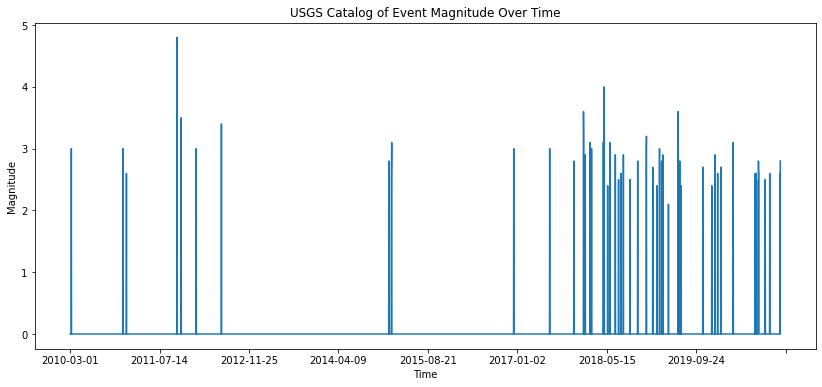

In [10]:
#I want to compare that plot to one of only the usgs catalog, in case I get the common question of comparing two different catalog
usgs_all['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('USGS Catalog of Event Magnitude Over Time');

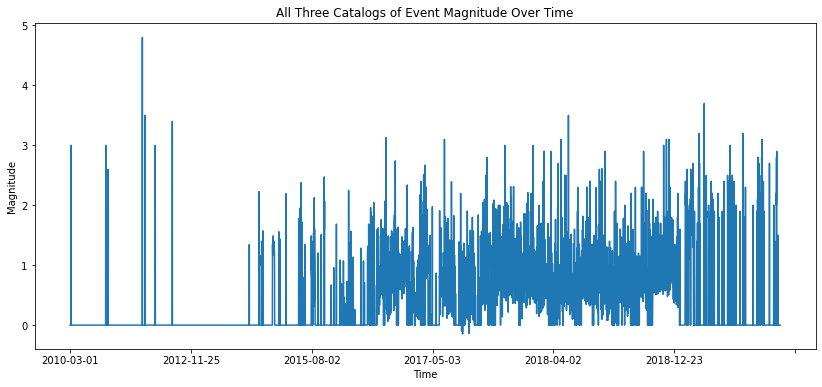

In [13]:
#Now I'd like to look at the seismicity for all three catalogs
three_cats['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('All Three Catalogs of Event Magnitude Over Time');

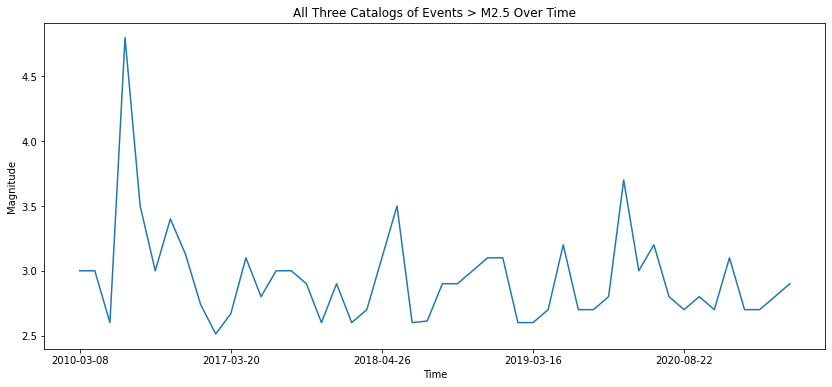

In [25]:
#What does it look like if I only focus on the larger events over time?
three_cats_big = three_cats[three_cats['Magnitude'] > 2.5]
three_cats_big['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('All Three Catalogs of Events > M2.5 Over Time');

In [ ]:
#It doesn't look great. The timeline got messed up because of gaps between big events

In [26]:
#let me do a little EDA on the three_cats_big data though
#looks like there were 48 events
three_cats_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 2010-03-08 to 2021-01-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        48 non-null     object 
 1   Latitude (WGS84)   48 non-null     float64
 2   Longitude (WGS84)  48 non-null     float64
 3   Magnitude          48 non-null     float64
 4   EventID            26 non-null     object 
 5   Evaluation Status  48 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [27]:
three_cats_big.index = pd.to_datetime(three_cats_big.index)
three_cats_big_yr = three_cats_big.resample('Y').count()
three_cats_big_yr

,Origin Time,Latitude (WGS84),Longitude (WGS84),Magnitude,EventID,Evaluation Status
2010-12-31,2,2,2,2,2,2
2011-12-31,3,3,3,3,3,3
2012-12-31,2,2,2,2,2,2
2013-12-31,0,0,0,0,0,0
2014-12-31,0,0,0,0,0,0
2015-12-31,0,0,0,0,0,0
2016-12-31,2,2,2,2,0,2
2017-12-31,4,4,4,4,0,4
2018-12-31,16,16,16,16,0,16
2019-12-31,8,8,8,8,8,8


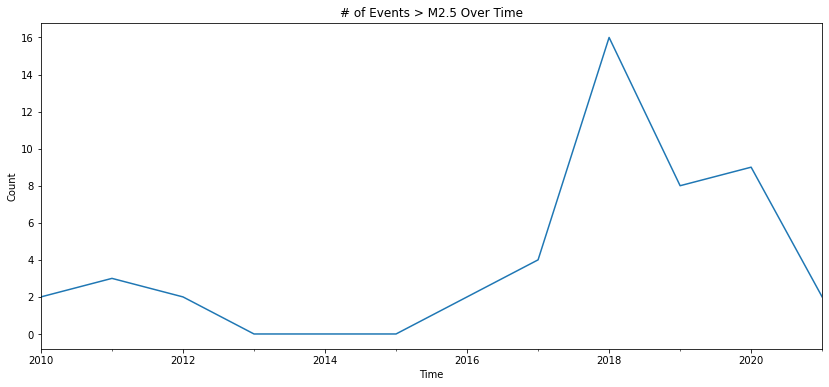

In [31]:
three_cats_big_yr['Magnitude'].plot(figsize=(14,6), label='Large Events/Yr')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('# of Events > M2.5 Over Time');

Wow, this clearly shows that the number of large events is increasing over time. 2018 was definitely the most active year for larger events. It's interesting that 2020 continues to have larger events because I think the activity level really decreased over most of 2020 due to COVID and the drop in oil price. I wonder if 2021 will be just as active as the oil price has rebounded and companies are becoming more active again.

In [29]:
#I wonder if I resample the total catalog to weekly if the increase in seismicity is clearer to see
seismicity.index = pd.to_datetime(seismicity.index)
seismicity_weekly_avg = seismicity.resample('W').mean()

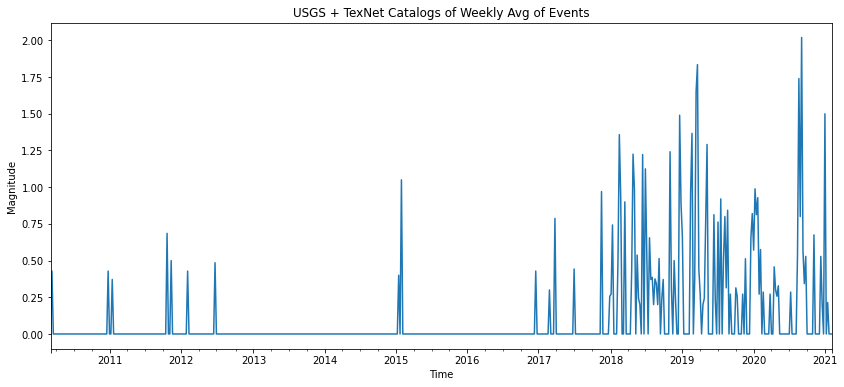

In [30]:
seismicity_weekly_avg['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('USGS + TexNet Catalogs of Weekly Avg of Events');

In [32]:
usgs_all.index = pd.to_datetime(usgs_all.index)
usgs_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3971 entries, 2010-03-01 to 2021-01-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Origin Time        65 non-null     object 
 1   Latitude (WGS84)   65 non-null     float64
 2   Longitude (WGS84)  65 non-null     float64
 3   Magnitude          3971 non-null   float64
 4   EventID            65 non-null     object 
 5   Evaluation Status  65 non-null     object 
dtypes: float64(3), object(3)
memory usage: 217.2+ KB


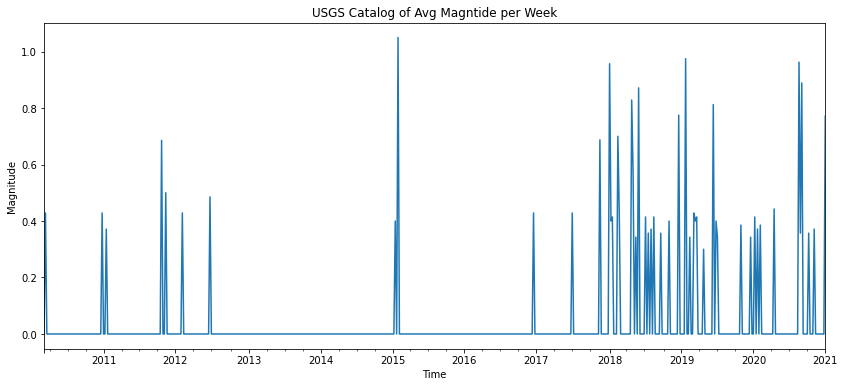

In [33]:
#going to do the same for the usgs catalog on its own
usgs_all_weekly_avg = usgs_all.resample('W').mean()
#now plot
usgs_all_weekly_avg['Magnitude'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('USGS Catalog of Avg Magntide per Week');

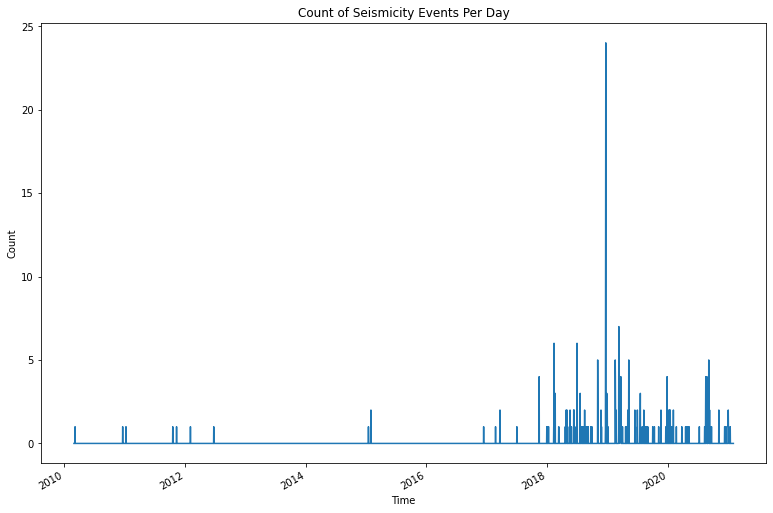

In [34]:
seismicity['Daily_Count'].plot(figsize=(13,9))
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of Seismicity Events Per Day');

In [35]:
#I see a pretty big spike on one day- like 25 events! Is that for real?
seismicity['Daily_Count'].unique()

array([ 0,  1,  2,  4,  6,  3,  5, 12, 24,  7])

In [36]:
#I looked at the TexNet site, and yes, those days actually do have quite a few events
seismicity[seismicity['Daily_Count'] == 12]

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2018-12-21,texnet2018yydy,final,18:08:04,1.3,28.9984,-97.9102,Near Coast of Texas,18.0,1.5,12
2018-12-21,texnet2018yxrz,final,12:03:54,1.5,29.0158,-97.8864,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yxyy,final,15:35:38,1.2,29.0021,-97.8771,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yybh,final,16:46:17,1.7,28.9865,-97.9277,Near Coast of Texas,18.0,1.5,12
2018-12-21,texnet2018yyby,final,17:06:54,1.5,29.0094,-97.9184,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yyax,final,16:37:06,1.6,29.0021,-97.9019,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yygn,final,19:25:19,1.8,29.0195,-97.9112,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yyhl,final,19:52:48,1.5,29.0204,-97.9143,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yyil,final,20:22:53,1.6,29.0085,-97.9029,Central Texas,18.0,1.5,12
2018-12-21,texnet2018yyng,final,22:49:43,1.3,29.0103,-97.9029,Central Texas,18.0,1.5,12


In [37]:
large_mag = seismicity[seismicity['Magnitude']>2.9]
large_mag.tail(20)

,EventID,Evaluation Status,Origin Time,Magnitude,Latitude (WGS84),Longitude (WGS84),LocationName,Daily_Sum,Daily_Avg,Daily_Count
2017-07-02,texnet2017mvfk,final,09:00:46,3.1,29.0195,-97.9319,Central Texas,3.1,3.100000,1
2017-11-14,texnet2017wiiy,final,15:24:14,3.0,28.9197,-97.9949,Near Coast of Texas,9.7,2.425000,4
2018-01-09,texnet2018aqeb,final,20:14:04,3.0,29.0030,-97.9174,Central Texas,3.0,3.000000,1
2018-02-12,texnet2018czvr,final,14:24:51,3.2,28.9938,-97.9091,Near Coast of Texas,14.2,2.366667,6
2018-02-19,texnet2018dnfi,final,22:04:32,3.0,29.0222,-97.8543,Central Texas,8.4,2.800000,3
2018-03-12,texnet2018eyqm,final,09:44:18,3.3,29.1403,-97.6920,Central Texas,3.3,3.300000,1
2018-03-13,texnet2018fajs,final,08:35:17,3.0,29.0863,-97.6703,Central Texas,3.0,3.000000,1
2018-04-21,texnet2018htks,final,05:44:17,3.0,28.9920,-97.8802,Near Coast of Texas,3.0,3.000000,1
2018-04-26,texnet2018idob,final,18:49:48,3.3,28.9645,-98.0043,Southern Texas,5.2,2.600000,2
2018-05-01,texnet2018immz,final,16:28:56,3.5,28.9188,-98.0125,Southern Texas,6.1,3.050000,2


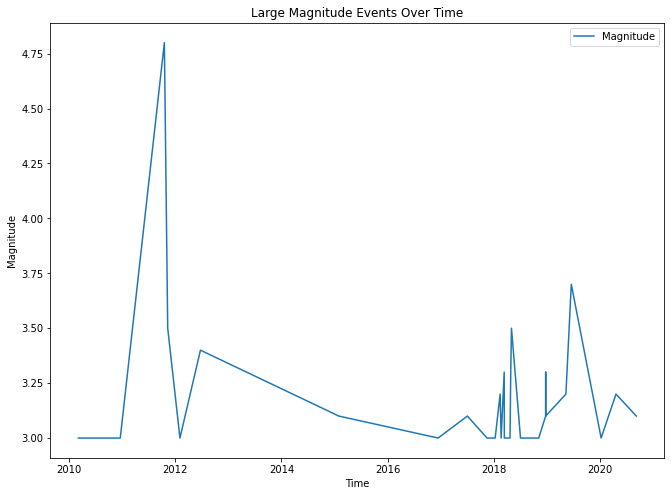

In [21]:
#plot the large events over time
fig, ax = plt.subplots(figsize=(11,8))
plt.plot(large_mag.index, large_mag['Magnitude'], label = 'Magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Large Magnitude Events Over Time');

### EDA on the FracFocus dataset

In [38]:
ref_data = pd.read_csv('oil_and_gas_data/reference_data/reference_completion_information.csv', index_col=0)
ref_data.head()

,JobStartDate,JobEndDate,APINumber,OperatorName,WellName,TotalBaseWaterVolume,Purpose,IngredientName,PercentHFJob,Job_Duration,Sand_Purpose,Sand_IngredientName,Sum_Sand_PctHFJob,VolumeH2O_per_Day,Water_per_Ft
StartDate,,,,,,,,,,,,,,,
2015-03-23,2015-03-23,2015-04-08,42255340560000,"EOG Resources, Inc.",KOPECKI UNIT # 3H,12979297.80,Carrier/Base Fluid,Water,86.34536,16,Proppant,Crystalline Silica,12.58166,8.112061e+05,2458.200341
2015-03-26,2015-03-26,2015-04-08,42255341510000,"EOG Resources, Inc.",KOPECKI UNIT # 6H,12896549.82,Carrier/Base Fluid,Water,86.66407,13,Proppant,Crystalline Silica,12.23992,9.920423e+05,2442.528375
2015-03-27,2015-03-27,2015-04-02,42255342420000,ConocoPhillips Company/Burlington Resources,Bodogginz Unit A5,4516261.00,"Inhibitor Aid , Corrosion Inhibitor, Bacterici...",Water (Including Mix Water Supplied by Client)*,82.51757,6,"Inhibitor Aid , Corrosion Inhibitor, Bacterici...","Quartz, Crystalline silica",16.92347,7.527102e+05,855.352462
2015-03-27,2015-03-27,2015-04-02,42255342400000,ConocoPhillips Company/Burlington Resources,Bodogginz Unit A3,4482409.00,"Inhibitor Aid , Corrosion Inhibitor, Bacterici...",Water (Including Mix Water Supplied by Client)*,83.86546,6,"Inhibitor Aid , Corrosion Inhibitor, Bacterici...","Quartz, Crystalline silica",15.61019,7.470682e+05,848.941098
2015-03-29,2015-03-29,2015-04-03,42255342240000,"EOG Resources, Inc.",SIMMONS UNIT # 2H,10910802.00,Carrier/Base Fluid,Water,89.14624,5,Proppant,Crystalline Silica,10.51313,2.182160e+06,2066.439773


In [39]:
#now that I have a consolidated dataset, I need to calculate frac duration and see about making the job start date a datetime column
daily_fracs = pd.read_csv('oil_and_gas_data/reference_data/completion_information_by_day.csv', index_col=0)
daily_fracs.head()

,fracs_per_day,volume_per_day,avg_volh2o_per_ft,APIs
2015-03-23,1,8.112061e+05,2458.200341,[42255340560000]
2015-03-24,1,8.112061e+05,2458.200341,[42255340560000]
2015-03-25,1,8.112061e+05,2458.200341,[42255340560000]
2015-03-26,2,1.803248e+06,2450.364358,"[42255340560000, 42255341510000]"
2015-03-27,4,3.303027e+06,1651.255569,"[42255340560000, 42255341510000, 4225534242000..."


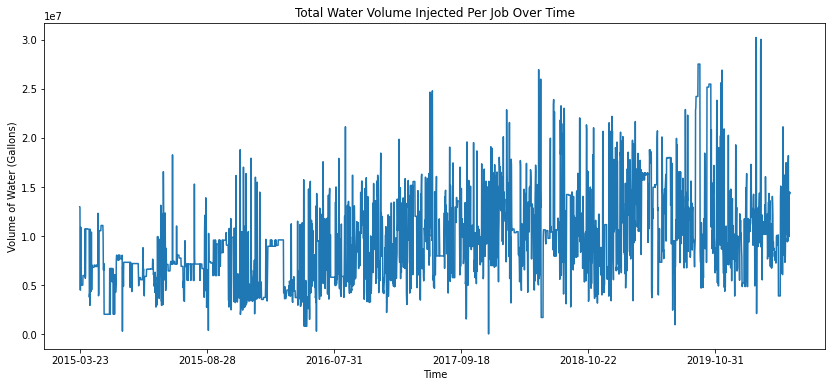

In [40]:
#the first plot I'd like to make is a look at how the Total Volume of Water has changed in each frac over time
ref_data['TotalBaseWaterVolume'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Volume of Water (Gallons)')
plt.title('Total Water Volume Injected Per Job Over Time');

In [41]:
#I need to plot a trend line on here, but it looks like fracs have gotten larger over time

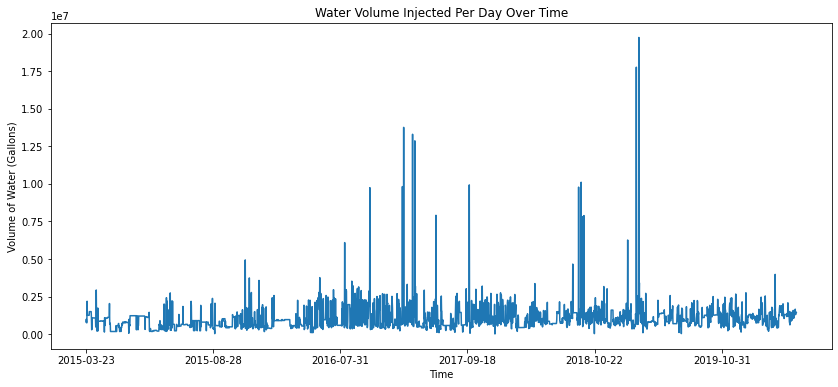

In [42]:
ref_data['VolumeH2O_per_Day'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Volume of Water (Gallons)')
plt.title('Water Volume Injected Per Day Over Time');

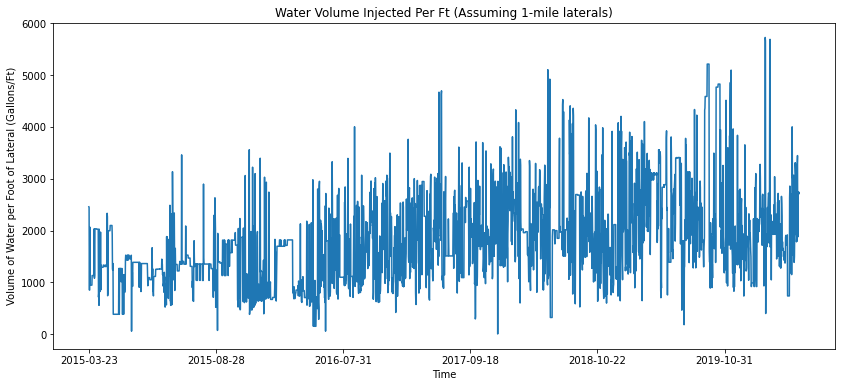

In [43]:
ref_data['Water_per_Ft'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Volume of Water per Foot of Lateral (Gallons/Ft)')
plt.title('Water Volume Injected Per Ft (Assuming 1-mile laterals)');

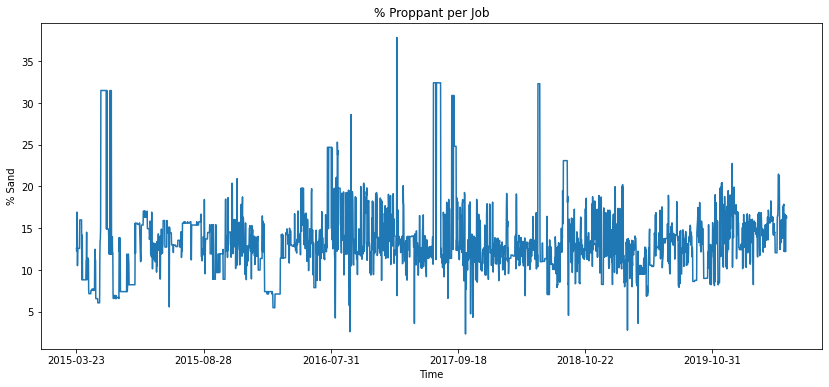

In [44]:
ref_data['Sum_Sand_PctHFJob'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('% Sand')
plt.title('% Proppant per Job');

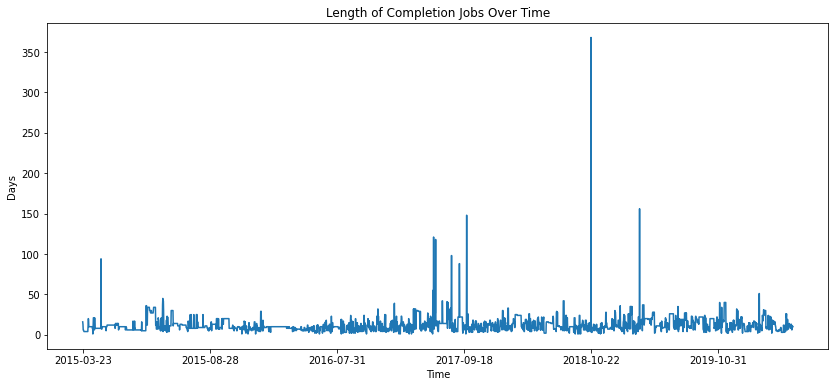

In [45]:
ref_data['Job_Duration'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Days')
plt.title('Length of Completion Jobs Over Time');

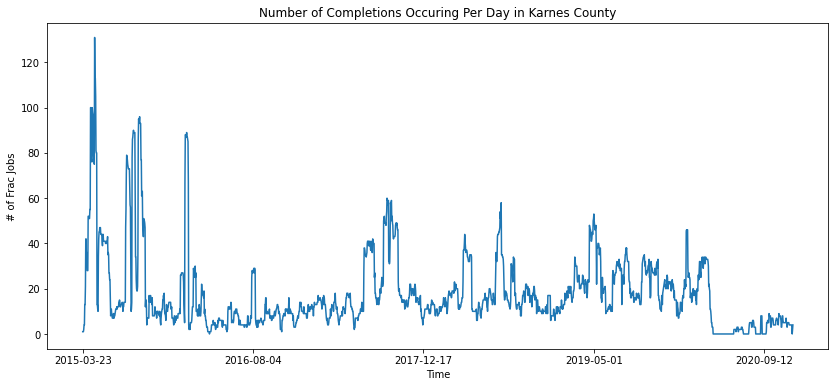

In [46]:
daily_fracs['fracs_per_day'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('# of Frac Jobs')
plt.title('Number of Completions Occuring Per Day in Karnes County');

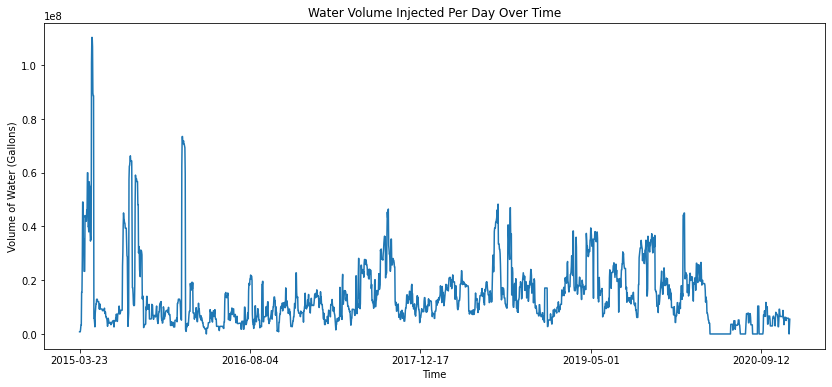

In [47]:
daily_fracs['volume_per_day'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Volume of Water (Gallons)')
plt.title('Water Volume Injected Per Day Over Time');

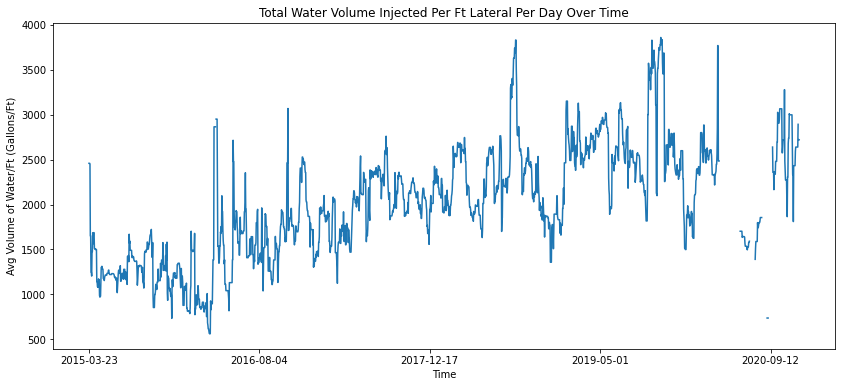

In [48]:
daily_fracs['avg_volh2o_per_ft'].plot(figsize=(14,6))
plt.xlabel('Time')
plt.ylabel('Avg Volume of Water/Ft (Gallons/Ft)')
plt.title('Total Water Volume Injected Per Ft Lateral Per Day Over Time');

### EDA on the master dataframe that has all the data ready for modelling

In [49]:
master_df = pd.read_csv('oil_and_gas_data/data_for_modelling/data_ready_for_modelling.csv', index_col=0, parse_dates=True)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1859 entries, 2016-01-01 to 2021-02-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daily_Avg          1859 non-null   float64
 1   Daily_Sum          1859 non-null   float64
 2   Daily_Count        1859 non-null   int64  
 3   Dly_Cnt_Diff       1858 non-null   float64
 4   Rig_Count          1760 non-null   float64
 5   WTI_Spot_Price     1859 non-null   float64
 6   Brent_Spot_Price   1859 non-null   float64
 7   fracs_per_day      1801 non-null   float64
 8   volume_per_day     1801 non-null   float64
 9   avg_volh2o_per_ft  1695 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 159.8 KB


In [50]:
master_df.head(3)

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2016-01-01,0.0,0.0,0,NaN,33.0,37.13,36.61,9.0,5.080098e+06,1088.829502
2016-01-02,0.0,0.0,0,0.0,33.0,37.13,36.61,11.0,5.892634e+06,1044.749861
2016-01-03,0.0,0.0,0,0.0,33.0,37.13,36.61,9.0,4.539134e+06,1125.551135


In [51]:
#I need to scale the volume_per_day injection rate back
master_df['volume_per_day'] = master_df['volume_per_day']/1_000_000

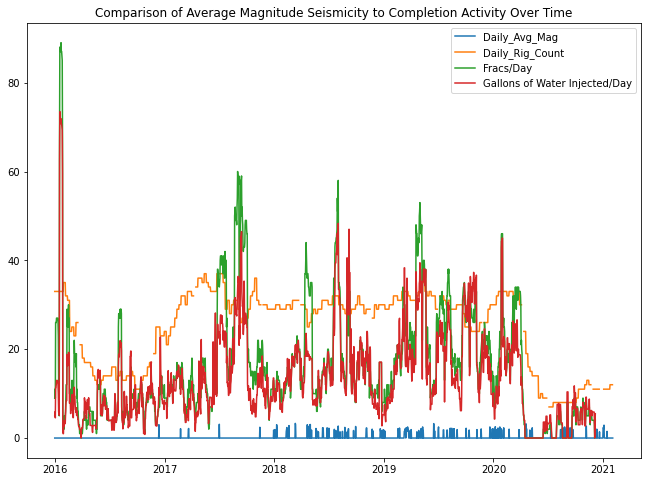

In [52]:
fig, ax = plt.subplots(figsize=(11,8))
plt.plot(master_df.index, master_df['Daily_Avg'], label = 'Daily_Avg_Mag')
plt.plot(master_df.index, master_df['Rig_Count'], label = 'Daily_Rig_Count')
plt.plot(master_df.index, master_df['fracs_per_day'], label = 'Fracs/Day')
plt.plot(master_df.index, master_df['volume_per_day'], label = 'Gallons of Water Injected/Day')
plt.title('Comparison of Average Magnitude Seismicity to Completion Activity Over Time');
plt.legend();

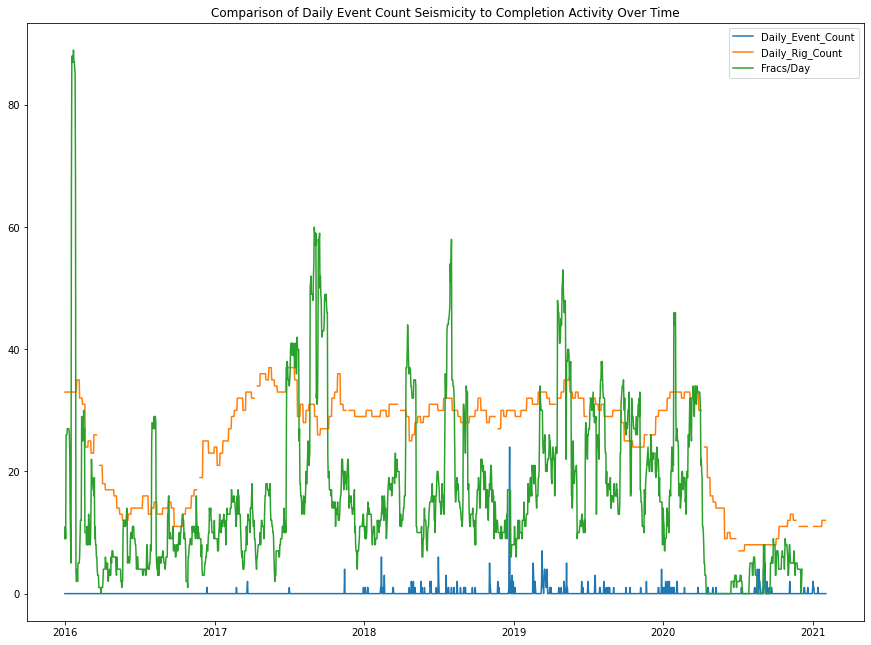

In [68]:
fig, ax = plt.subplots(figsize=(15,11))
plt.plot(master_df.index, master_df['Daily_Count'], label = 'Daily_Event_Count')
plt.plot(master_df.index, master_df['Rig_Count'], label = 'Daily_Rig_Count')
plt.plot(master_df.index, master_df['fracs_per_day'], label = 'Fracs/Day')
plt.title('Comparison of Daily Event Count Seismicity to Completion Activity Over Time')
plt.legend();

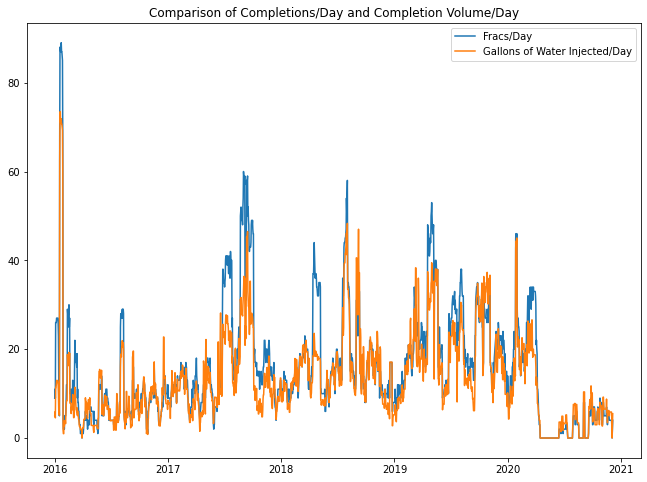

In [54]:
fig, ax = plt.subplots(figsize=(11,8))
plt.plot(master_df.index, master_df['fracs_per_day'], label = 'Fracs/Day')
plt.plot(master_df.index, master_df['volume_per_day'], label = 'Gallons of Water Injected/Day')
plt.title('Comparison of Completions/Day and Completion Volume/Day')
plt.legend();

I'd like to do a deeper dive into the data for the 4Q 2018 time period. 

In [55]:
dec_df = master_df.loc['1-1-2018':'3-31-2019',]
dec_df.head()

,Daily_Avg,Daily_Sum,Daily_Count,Dly_Cnt_Diff,Rig_Count,WTI_Spot_Price,Brent_Spot_Price,fracs_per_day,volume_per_day,avg_volh2o_per_ft
2018-01-01,0.0,0.0,0,0.0,29.0,60.46,66.73,11.0,9.756934,2296.189464
2018-01-02,0.0,0.0,0,0.0,29.0,60.37,66.65,10.0,9.153045,2342.811706
2018-01-03,1.9,1.9,1,1.0,29.0,61.61,67.85,9.0,8.132097,2237.885860
2018-01-04,0.0,0.0,0,-1.0,29.0,61.98,68.73,9.0,8.132097,2237.885860
2018-01-05,0.0,0.0,0,0.0,29.0,61.49,68.01,11.0,10.373297,2351.808369


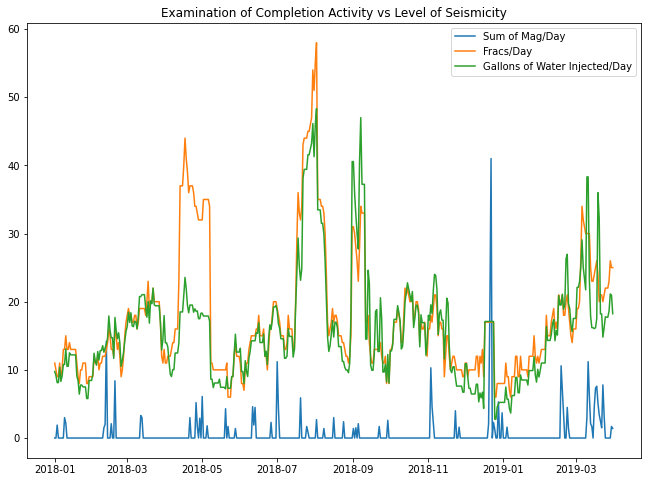

In [56]:
fig, ax = plt.subplots(figsize=(11,8))
plt.plot(dec_df.index, dec_df['Daily_Sum'], label = 'Sum of Mag/Day')
plt.plot(dec_df.index, dec_df['fracs_per_day'], label = 'Fracs/Day')
plt.plot(dec_df.index, dec_df['volume_per_day'], label = 'Gallons of Water Injected/Day')
plt.legend()
plt.title('Examination of Completion Activity vs Level of Seismicity');

I'd like to make a similar plot using the Fasola dataset for the same time period.

In [61]:
fasola_data = pd.read_csv('oil_and_gas_data/data_for_modelling/fasola_data_ready_for_modelling.csv', index_col=0)

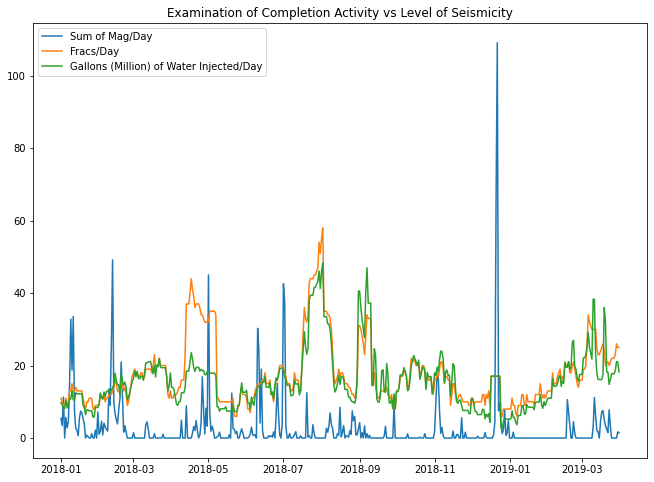

In [67]:
fasola_data.index = pd.to_datetime(fasola_data.index)
fasola_dec = fasola_data.loc['1-1-2018':'3-31-2019',]

fig, ax = plt.subplots(figsize=(11,8))
plt.plot(fasola_dec.index, fasola_dec['Daily_Sum'], label = 'Sum of Mag/Day')
plt.plot(fasola_dec.index, fasola_dec['fracs_per_day'], label = 'Fracs/Day')
plt.plot(fasola_dec.index, fasola_dec['volume_per_day']/1000000, label = 'Gallons (Million) of Water Injected/Day')
plt.legend()
plt.title('Examination of Completion Activity vs Level of Seismicity');

I'd like to make a summary plot using the Fasola data.

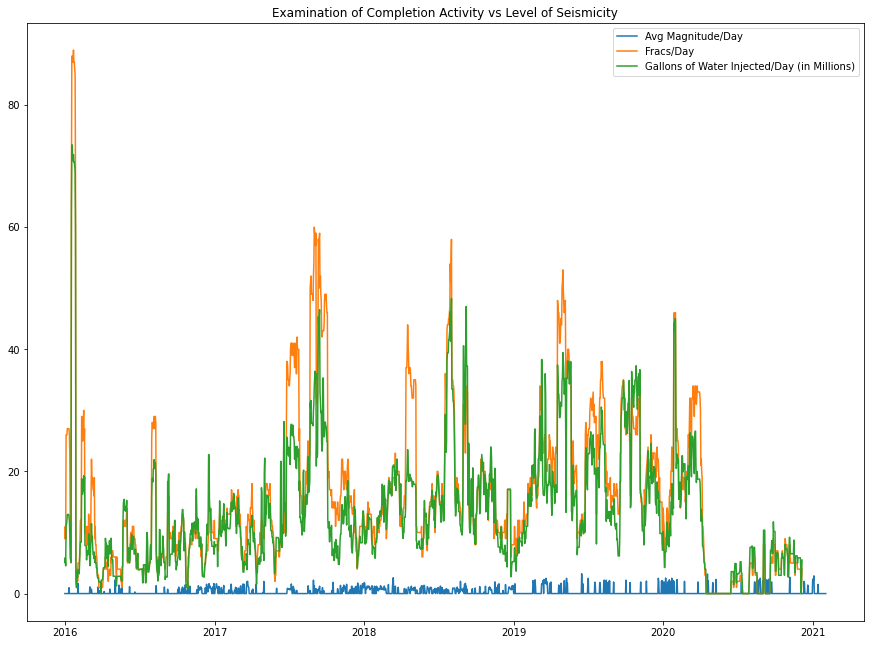

In [72]:
fig, ax = plt.subplots(figsize=(15,11))
plt.plot(fasola_data.index, fasola_data['Daily_Avg'], label = 'Avg Magnitude/Day')
plt.plot(fasola_data.index, fasola_data['fracs_per_day'], label = 'Fracs/Day')
plt.plot(fasola_data.index, fasola_data['volume_per_day']/1000000, label = 'Gallons of Water Injected/Day (in Millions)')
plt.legend()
plt.title('Examination of Completion Activity vs Level of Seismicity');